In [37]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Librerías para trabajar con fechas
# -----------------------------------------------------------------------
from datetime import datetime

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
# pd.set_option('display.max_rows', None) # para poder visualizar todas las filas de los DataFrames

In [38]:
df = pd.read_csv('/Users/yohanna/Desktop/Adalab/Modulo4/Proyecto/proyecto-da-promof-modulo4-equipo5/data/bookings_clean_ok.csv', index_col=0)

Cancelacion


In [39]:
df.head(10)

,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status,change_room,adr,lead_time,stays_in_weekend_nights,stays_in_week_nights,total_nights
0,Resort Hotel,No Cancelado,2015.0,July,27.0,1.0,2,0,0,BB,Portugal,Unknown,Direct,First time,0,0,C,C,3,Unknown,Unknown,0,Transient,0,0,Check-Out,equal,0.0,342,0,0,0
1,Resort Hotel,No Cancelado,2015.0,July,27.0,1.0,2,0,0,BB,Unknown,Unknown,Direct,First time,0,0,Unknown,C,4,Unknown,Unknown,0,Transient,0,0,Check-Out,change,0.0,737,0,0,0
2,Resort Hotel,No Cancelado,2015.0,July,27.0,1.0,1,0,0,BB,United Kingdom,Unknown,Direct,First time,0,0,A,C,0,Unknown,Unknown,0,Transient,0,0,Check-Out,change,75.0,7,0,1,1
3,Resort Hotel,No Cancelado,2015.0,July,27.0,1.0,1,0,0,BB,United Kingdom,Corporate,Corporate,First time,0,0,A,A,0,304.0,Unknown,0,Transient,0,0,Check-Out,equal,75.0,13,0,1,1
4,Resort Hotel,No Cancelado,2015.0,July,NaN,1.0,2,0,0,BB,Unknown,Online TA,TA/TO,First time,0,0,A,A,0,240.0,Unknown,0,Transient,0,1,Check-Out,equal,98.0,14,0,2,2
5,Resort Hotel,No Cancelado,2015.0,July,27.0,1.0,2,0,0,BB,United Kingdom,Online TA,TA/TO,First time,0,0,A,A,0,240.0,Unknown,0,Unknown,0,1,Check-Out,equal,98.0,14,0,2,2
6,Resort Hotel,No Cancelado,2015.0,July,NaN,1.0,2,0,0,BB,Unknown,Direct,Direct,First time,0,0,C,C,0,Unknown,Unknown,0,Unknown,0,0,Check-Out,equal,107.0,0,0,2,2
7,Resort Hotel,No Cancelado,2015.0,July,27.0,1.0,2,0,0,FB,Unknown,Direct,Direct,First time,0,0,C,C,0,303.0,Unknown,0,Unknown,0,1,Check-Out,equal,103.0,9,0,2,2
8,Resort Hotel,Cancelado,2015.0,July,27.0,1.0,2,0,0,BB,Portugal,Unknown,Unknown,First time,0,0,A,A,0,240.0,Unknown,0,Transient,0,1,Canceled,equal,82.0,85,0,3,3
9,Resort Hotel,Cancelado,2015.0,July,27.0,1.0,2,0,0,HB,Unknown,Unknown,TA/TO,First time,0,0,D,D,0,15.0,Unknown,0,Transient,0,0,Canceled,equal,105.5,75,0,3,3


In [40]:
df.columns

Index(['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month', 'adults',
       'children', 'babies', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status', 'change_room', 'adr',
       'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'total_nights'],
      dtype='object')

En qué época del año se cancela más

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

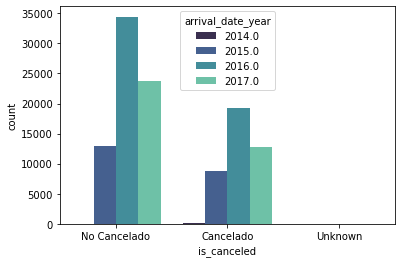

In [41]:
sns.countplot(x = 'is_canceled', 
              data = df, 
              palette = "mako", 
              hue = 'arrival_date_year')

In [42]:
df_cancelado = df[df['is_canceled'] == 'Cancelado']

país con mas cancelacion

In [43]:
df_cancelado['country'].value_counts()[:10]

Unknown           19631
Portugal          14386
United Kingdom     1367
Spain              1192
France             1070
Italy               727
Germany             644
Ireland             452
Brazil              428
China               388
Name: country, dtype: int64

<AxesSubplot:xlabel='country', ylabel='count'>

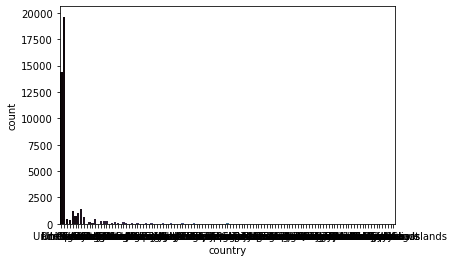

In [44]:
sns.countplot(x = 'country', 
              data = df_cancelado, 
              palette = "mako", 
        )

¿Qué hoteles tienen más reservas?

In [45]:
reservas_hotel = df['hotel'].value_counts()
reservas_hotel

City Hotel      78066
Resort Hotel    39939
Unknown          1831
Name: hotel, dtype: int64

In [46]:
hotel_mas_reservas = reservas_hotel.idxmax()
cantidad_reservas = reservas_hotel.max()

print(f"El hotel con más reservas es {hotel_mas_reservas} con {cantidad_reservas} reservas")

El hotel con más reservas es City Hotel con 78066 reservas


¿Qué tipo de habitación tienes más reservas?

In [47]:
reservas_hab = df['reserved_room_type'].value_counts()
reservas_hab

A          56144
Unknown    41638
D          12619
E           4344
F           1907
G           1375
B            746
C            625
H            428
P              6
L              4
Name: reserved_room_type, dtype: int64

In [48]:
hab_mas_reservada = reservas_hab.idxmax()
cant_reservas_hab = reservas_hab.max()
print(f"La habitacion con más reservas es {hab_mas_reservada} con {cant_reservas_hab} reservas")

La habitacion con más reservas es A con 56144 reservas


¿Con cuánto tiempo se hace la reserva de media? 

In [49]:
temp_medio_reserva = df['lead_time'].mean()

temp_medio_reserva

103.12403618278314

¿En qué momento de la semana se resgistran más reservas:findes o entre semana?

In [50]:
reservas_finde = df['stays_in_weekend_nights'].sum()

reservas_entre = df['stays_in_week_nights'].sum()

if reservas_finde > reservas_entre:
    print("más reservas durante los fines de semana")
elif reservas_finde < reservas_entre:
    print("más reservas entre semana")
else:
    print("El número de reservas es igual")

más reservas entre semana


¿Cuántos cambios de reserva se hacen?

In [51]:
cambios_reserva = df['booking_changes'].sum()
cambios_reserva

27665

¿Qué hoteles tienen mayor lista de espera?

In [52]:
lista_espera_hotel = df.groupby('hotel')['days_in_waiting_list'].sum()

hoteles_max_lista_espera = lista_espera_hotel.idxmax()
dias_max_lista_espera = lista_espera_hotel.max()

print(f"hotel con mayor lista de espera es '{hoteles_max_lista_espera}', con {dias_max_lista_espera} días en lista de espera")

hotel con mayor lista de espera es 'City Hotel', con 246696 días en lista de espera


¿En qué epoca del año hay más lista de espera?

In [53]:
lista_espera = df.groupby('arrival_date_month')['days_in_waiting_list'].sum()

mes_max_lista_espera = lista_espera.idxmax()
dias_max_lista_espera = lista_espera.max()

print(f" mes con más días en lista de espera es {mes_max_lista_espera}, con {dias_max_lista_espera} días en lista de espera.")

#??????????????

 mes con más días en lista de espera es October, con 50280 días en lista de espera.


In [54]:
espera_dias = df['days_in_waiting_list'].value_counts()
espera_dias

0      116283
39        209
58        152
44        137
31        111
        ...  
116         1
109         1
37          1
89          1
36          1
Name: days_in_waiting_list, Length: 128, dtype: int64

Analizar la evolucion el precio por noche YoY y en el anual

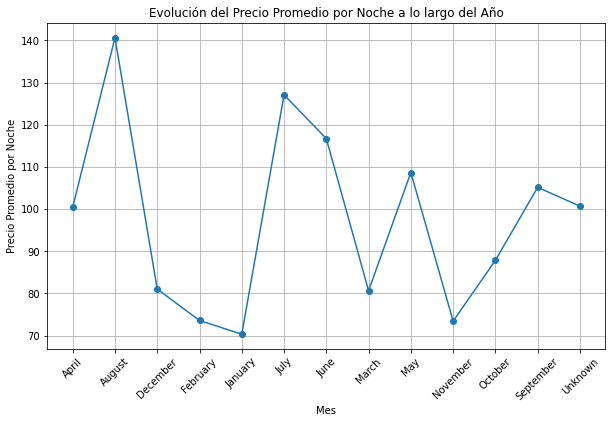

In [55]:
precio_por_mes = df.groupby('arrival_date_month')['adr'].mean()

plt.figure(figsize=(10, 6))
plt.plot(precio_por_mes.index, precio_por_mes.values, marker='o', linestyle='-')
plt.title('Evolución del Precio Promedio por Noche a lo largo del Año')
plt.xlabel('Mes')
plt.ylabel('Precio Promedio por Noche')
plt.xticks(rotation=45)
plt.grid(True);


Evolución anual, ver picos max/min de reservas

 máximo de reservas en el año fue 2016.0, y  mínimo fue en el año 2014.0.


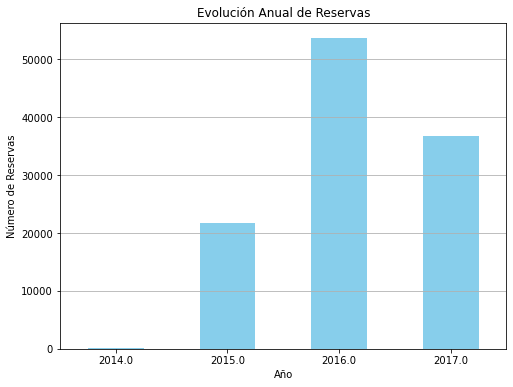

In [56]:
reservas_año = df.groupby('arrival_date_year').size()

max_reservas = reservas_año.idxmax()
min_reservas = reservas_año.idxmin()

plt.figure(figsize=(8, 6))
reservas_año.plot(kind='bar', color='skyblue')
plt.title('Evolución Anual de Reservas')
plt.xlabel('Año')
plt.ylabel('Número de Reservas')
plt.xticks(rotation=0)
plt.grid(axis='y');

print(f" máximo de reservas en el año fue {max_reservas}, y  mínimo fue en el año {min_reservas}.")
